In [55]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import seaborn as sns

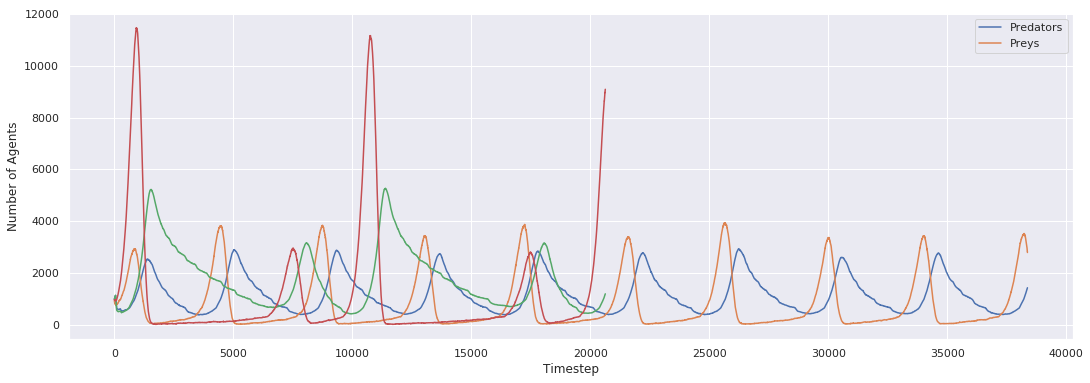

In [56]:
with open('results/simple_population_dynamics/exp_2/test_logs/5/log.txt') as f:
    lines = f.readlines()
    prey_num = []
    predator_num = []
    for line in lines:
        line = line.split()
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
        
with open('results/simple_population_dynamics/exp_100/test_logs/1/log.txt') as f:
    lines = f.readlines()
    random_prey_num = []
    random_predator_num = []
    for line in lines:
        line = line.split()
        random_prey_num.append(int(line[7]))
        random_predator_num.append(int(line[9]))        
        
        
x = range(len(prey_num))
x_random = range(len(random_prey_num))
plt.figure(figsize=(18, 6))
sns.set_style("darkgrid")
plt.plot(x, predator_num)
plt.plot(x, prey_num)
plt.plot(x_random, random_predator_num)
plt.plot(x_random, random_prey_num)

plt.legend(['Predators', 'Preys'])
plt.xlabel('Timestep')
plt.ylabel('Number of Agents')
plt.show()

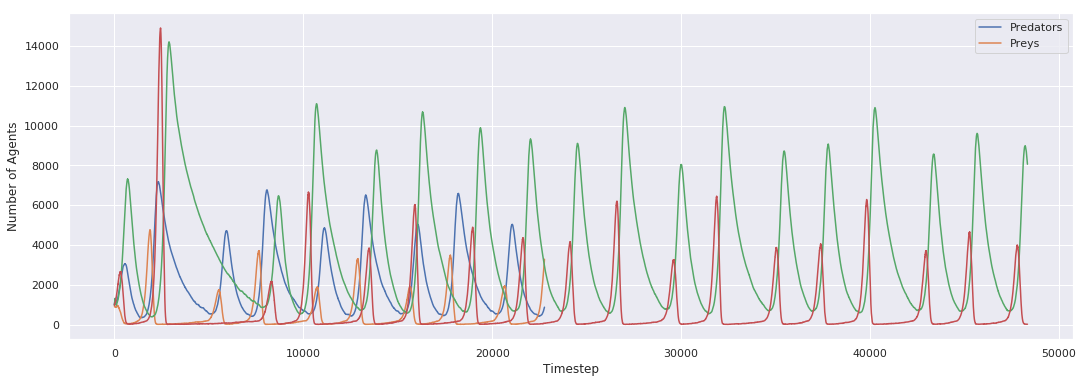

In [57]:

with open('results/simple_population_dynamics/exp_2/test_logs/6/log.txt') as f:
    lines = f.readlines()
    prey_num = []
    predator_num = []
    for line in lines:
        line = line.split()
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
        
with open('results/simple_population_dynamics/exp_100/test_logs/2/log.txt') as f:
    lines = f.readlines()
    random_prey_num = []
    random_predator_num = []
    for line in lines:
        line = line.split()
        random_prey_num.append(int(line[7]))
        random_predator_num.append(int(line[9]))        
        
        
x = range(len(prey_num))
x_random = range(len(random_prey_num))
plt.figure(figsize=(18, 6))
sns.set_style("darkgrid")
plt.plot(x, predator_num)
plt.plot(x, prey_num)
plt.plot(x_random, random_predator_num)
plt.plot(x_random, random_prey_num)

plt.legend(['Predators', 'Preys'])
plt.xlabel('Timestep')
plt.ylabel('Number of Agents')
plt.show()

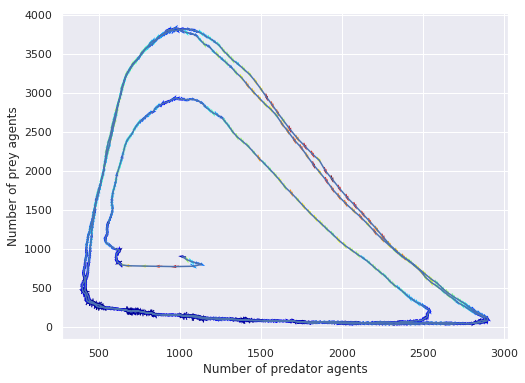

In [62]:
log_file = './results/simple_population_dynamics/exp_2/test_logs/0/log.txt'
st = 0
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))

predator_num = predator_num[st:10000]
prey_num = prey_num[st:10000]
ed = len(predator_num)
x = range(len(predator_num))
length = len(predator_num)

predator_num_avg = []
prey_num_avg = []

DX = [0]
DY = [0]
for i in range(0, length, 10):
    predator_tot = 0
    prey_tot = 0
    for j in range(i, min(i + 10, len(x))):
        predator_tot += predator_num[j]
        prey_tot += prey_num[j]

    predator_tot = 1. * predator_tot / 10.
    prey_tot = 1. * prey_tot / 10.
    predator_num_avg.append(predator_tot)
    prey_num_avg.append(prey_tot)
    DX.append(predator_num[j] - predator_num[i])
    DY.append(prey_num[j] - prey_num[i])    
    
M = (np.hypot(DX, DY))   
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX /= M                                        # Normalize each arrows
DY /= M
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
plt.grid()
plt.plot(predator_num_avg, prey_num_avg, label='number')
Q = p.quiver(predator_num_avg, prey_num_avg, DX, DY, M, pivot='mid', cmap=p.cm.jet)
plt.xlabel('Number of predator agents')
plt.ylabel('Number of prey agents')
#   plt.legend(['predator number', 'prey number'], loc='upper left')
plt.grid()



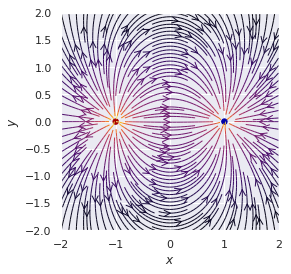

In [59]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**1
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

In [60]:
Ex

array([[-0.02543885, -0.02147513, -0.01703272, ..., -0.01703272,
        -0.02147513, -0.02543885],
       [-0.03069913, -0.02662063, -0.02200585, ..., -0.02200585,
        -0.02662063, -0.03069913],
       [-0.03665567, -0.03248372, -0.02771129, ..., -0.02771129,
        -0.03248372, -0.03665567],
       ...,
       [-0.03665567, -0.03248372, -0.02771129, ..., -0.02771129,
        -0.03248372, -0.03665567],
       [-0.03069913, -0.02662063, -0.02200585, ..., -0.02200585,
        -0.02662063, -0.03069913],
       [-0.02543885, -0.02147513, -0.01703272, ..., -0.01703272,
        -0.02147513, -0.02543885]])